In [33]:
import pandas as pd

In [34]:
df=pd.read_csv("Data/taxifare.csv",parse_dates=["pickup_datetime"])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-06-15 17:11:00.000000107,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247,1
1,2011-03-14 22:43:00.00000095,4.9,2011-03-14 22:43:00+00:00,-73.993552,40.731110,-73.998497,40.737200,5
2,2011-02-14 15:14:00.00000067,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328,1
3,2009-10-29 11:29:00.00000040,6.9,2009-10-29 11:29:00+00:00,-73.973703,40.763542,-73.984253,40.758603,5
4,2011-07-02 10:38:00.00000028,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162,1


# The parse_dates argument tells Pandas to parse the pickup_datetime column as a date. This will allow you to use date and time operations on the data

<Axes: xlabel='passenger_count', ylabel='count'>

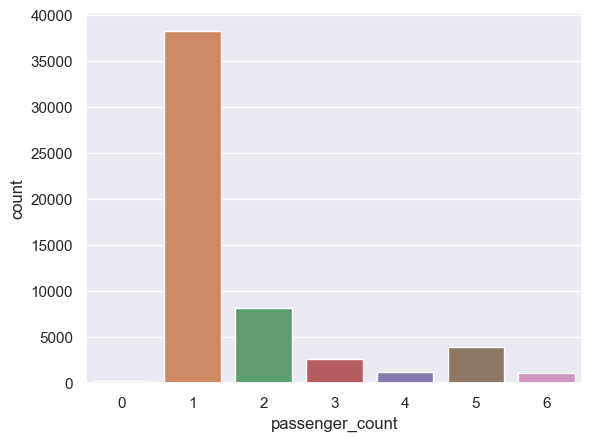

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.countplot(x=df["passenger_count"])

# Remove passenger with count <> 1
## The axis=1 parameter specifies that the columns should be dropped, as opposed to the rows. The drop() method takes a list of column names as its argument. 

In [36]:
df = df[df["passenger_count"]==1]
df=df.drop(["key","passenger_count"],axis=1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247
2,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328
4,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162
5,15.3,2011-12-09 20:03:00+00:00,-73.973500,40.792610,-73.936035,40.856548
8,7.7,2011-04-02 01:05:15+00:00,-73.979564,40.735405,-73.955686,40.768065


In [37]:
df.shape

(38233, 6)

In [38]:
corr_matrix=df.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount          1.000000
pickup_datetime      0.115992
dropoff_longitude    0.020438
pickup_longitude     0.015742
pickup_latitude     -0.015915
dropoff_latitude    -0.021711
Name: fare_amount, dtype: float64

# Below
The code x=(row["dropoff_longitude"]-row["pickup_longitude"])*54.6 and y=(row["dropoff_longitude"]-row["pickup_longitude"])*69.0 will calculate the distance between the pickup and dropoff locations in miles and kilometers, respectively. The dropoff_longitude and pickup_longitude columns of the DataFrame df contain the longitudes of the pickup and dropoff locations, respectively. The row variable is a row from the DataFrame. The * operator is used to multiply the two values together. The 54.6 and 69.0 values are the conversion factors from degrees to miles and kilometers, respectively.

In [39]:
from math import sqrt
for i,row in df.iterrows():
    dt = row["pickup_datetime"]
    df.at[i,"day_of_week"]=dt.weekday()
    df.at[i,"pickup_time"]=dt.hour
    x=(row["dropoff_longitude"]-row["pickup_longitude"])*54.6
    y=(row["dropoff_longitude"]-row["pickup_longitude"])*69.0
    distance = sqrt(x**2+y**2)
    df.at[i,"distance"]=distance
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,pickup_time,distance
0,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247,6.0,17.0,0.687462
2,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328,0.0,15.0,1.606513
4,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162,5.0,10.0,4.058166
5,15.3,2011-12-09 20:03:00+00:00,-73.973500,40.792610,-73.936035,40.856548,4.0,20.0,3.296528
8,7.7,2011-04-02 01:05:15+00:00,-73.979564,40.735405,-73.955686,40.768065,5.0,1.0,2.101014


# Drop unwanted columns

In [40]:
df.drop(columns=["pickup_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],inplace=True)

In [41]:
df.head()

,fare_amount,day_of_week,pickup_time,distance
0,7.0,6.0,17.0,0.687462
2,6.1,0.0,15.0,1.606513
4,10.5,5.0,10.0,4.058166
5,15.3,4.0,20.0,3.296528
8,7.7,5.0,1.0,2.101014


In [42]:
corr_matrix=df.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount    1.000000
distance       0.045194
day_of_week    0.009196
pickup_time   -0.019722
Name: fare_amount, dtype: float64

In [43]:
df.describe()

,fare_amount,day_of_week,pickup_time,distance
count,38233.000000,38233.000000,38233.000000,38233.000000
mean,11.214115,2.951534,13.387989,15.054776
std,9.703149,1.932809,6.446519,291.305494
min,-22.100000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,0.508316
50%,8.500000,3.000000,14.000000,1.087727
75%,12.500000,5.000000,19.000000,2.072325
max,256.000000,6.000000,23.000000,6514.524166


In [44]:
df = df[(df["distance"] > 1.0) & (df["distance"] < 10.0)]
df=df[(df["fare_amount"] > 0.0)&(df["fare_amount"] < 50.0)]

In [45]:
corr_matrix=df.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount    1.000000
distance       0.728607
day_of_week    0.003258
pickup_time   -0.023683
Name: fare_amount, dtype: float64

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

x= df.drop(["fare_amount"],axis=1)
y= df["fare_amount"]

# Model LinearRegressor

In [49]:
model= LinearRegression()
cross_val_score(model,x,y,cv=5).mean()

0.5295941284296068

# Model RandomForestRegressor

In [52]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
cross_val_score(model,x,y,cv=5).mean()

0.4611181767382222

# Model GradientBoostingRegressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
cross_val_score(model,x,y,cv=5).mean()

0.5402001030443373

# What is cv parameter?
cv is the number of folds to use for cross-validation. Cross-validation is a technique for evaluating the performance of a machine learning model on unseen data. It works by splitting the data into a training set and a test set. The model is trained on the training set and then evaluated on the test set. This process is repeated multiple times, with different splits of the data. The average of the scores from the multiple iterations is used as the final score for the model.


## Model Fitting

In [54]:
model.fit(x,y)

GradientBoostingRegressor()

In [57]:
model.predict(pd.DataFrame({'day_of_week': [4], 'pickup_time': [17],'distance': [2.0]}))

array([11.61950694])

In [58]:
model.predict(pd.DataFrame({ 'day_of_week': [5], 'pickup_time': [17],'distance': [2.0] }))

array([11.27831854])

### Regression models are supervised learning models that predict numeric outcomes such as the cost of a taxi ride. Prominent learning algorithms used for regression include the following:

Linear regression
Models training data by fitting it to the equation of a line <br>
Decision trees
Use binary trees to predict an outcome by answering a series of yes-and-no questions <br>
Random forests
Use multiple independent decision trees to model the data and are resistant to overfitting <br>
Gradient-boosting machines
Use multiple dependent decision trees, each modeling the error in the output from the last <br>
Support vector machines
Take an entirely different approach to modeling data by adding dimensionality under the supposition that data that isn’t linearly separable in the original problem space might be linearly separable in higher-dimensional space

### Scikit provides convenient implementations of these and other learning algorithms in classes such as LinearRegression, RandomForestRegressor, and GradientBoostingRegressor

###$  k-fold cross-validation gives you more confidence in the R2 score than simply splitting the data once for training and testing. k-fold trains the model k times, each time with the dataset split differently.